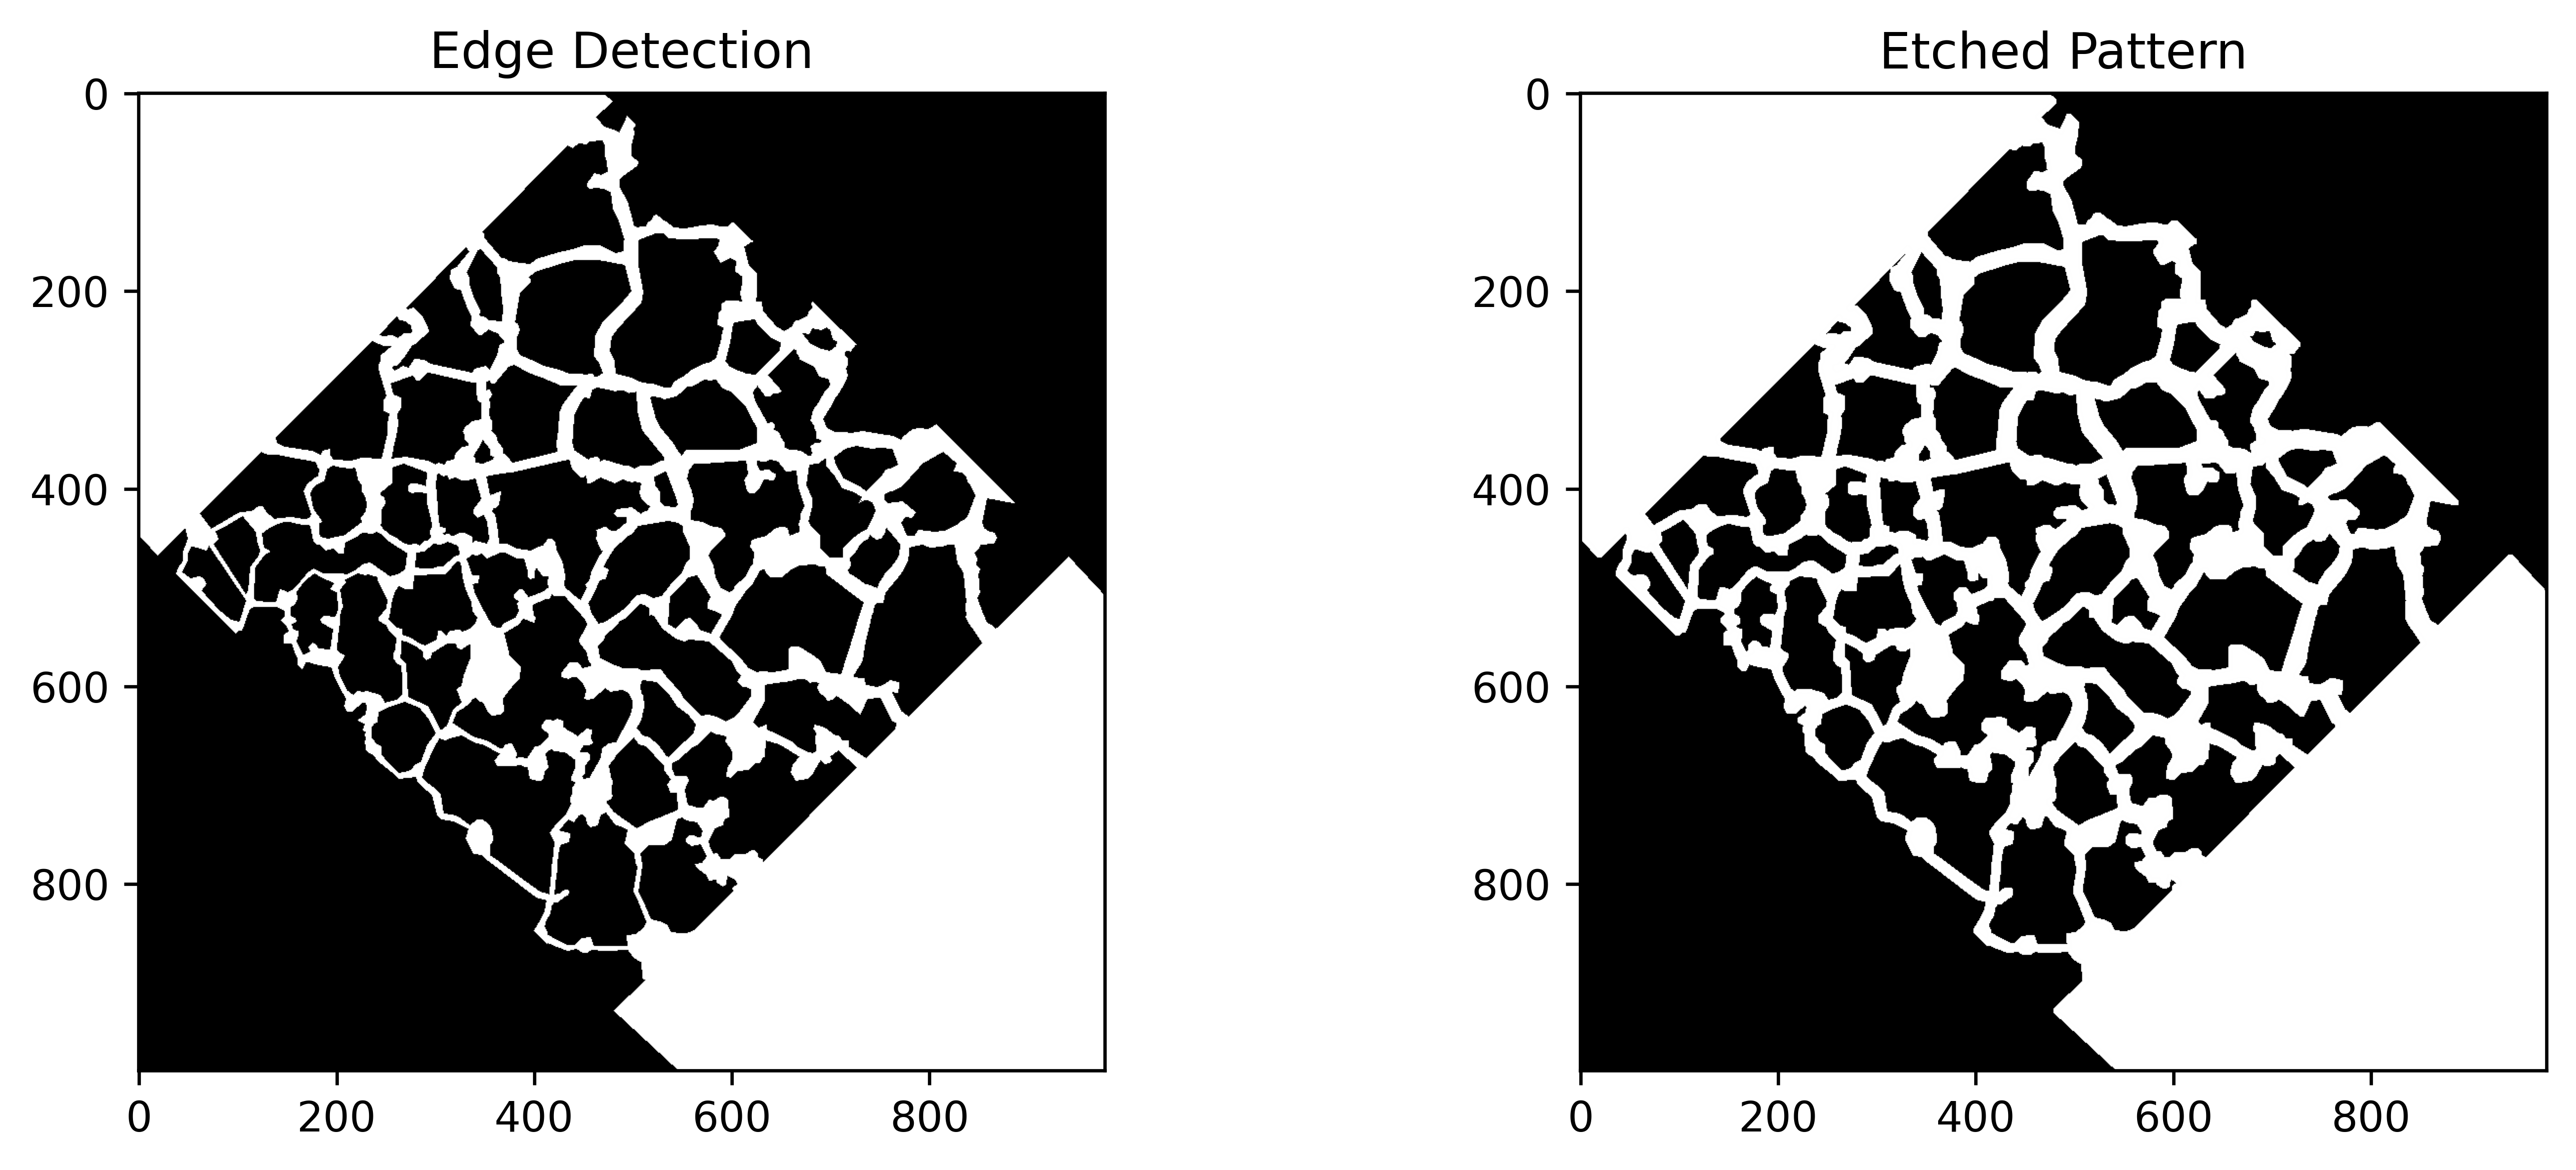

In [8]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image

def simulate_etching(image_path, etch_width):
    # 读取图像
    image = Image.open(image_path).convert("L")
    image_array =~ np.array(image)
    
    # 边缘检测
    count = image_array*0
    for j in range(image_array.shape[0]):
        for k in range(image_array.shape[1]):
            if image_array[j,k] == 255:
                try:
                    if image_array[j+1,k] == 0:
                        count[j,k] = 255

                    elif image_array[j-1,k] == 0:
                        count[j,k] = 255

                    elif image_array[j,k+1] == 0:
                        count[j,k] = 255

                    elif image_array[j,k-1] == 0:
                        count[j,k] = 255
                    else:
                        pass
                except:
                    pass

    #扩大边缘范围并进行刻蚀
    etched = ndimage.maximum_filter(count, size=(etch_width, etch_width))
    etched = etched + image_array
    # 绘制刻蚀前后的图像
    plt.figure(figsize=(10, 4),dpi=600)
    plt.subplot(121)
    plt.imshow(image_array, cmap='gray')
    plt.title('Edge Detection')
    
    plt.subplot(122)
    plt.imshow(etched, cmap='gray')
    plt.title('Etched Pattern')
    
    plt.tight_layout()
    plt.show()

# 示例用法
image_path = "./data/model.tif"
etch_width = 5 # 1pixel = 3um  

# 模拟湿法刻蚀
simulate_etching(image_path, etch_width)